# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
#on dev environment, conda install -c pyviz hvplot geoviews, pip install citipy
#Api key added to weather_api_key in api_keys.py and saved
#Api key added to geoapify_key in api_keys.py and saved

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
from api_keys import geoapify_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# # city_weather = requests.get(query_url).json()
# # city_weather
# pprint

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    query_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(query_url).json()
 
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lon = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lon, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })
    # If an error is experienced, skip the city?
    except:
        print("City not found. Skipping...")
        pass
    # Indicate that Data Loading is complete 
        print("-----------------------------")
        print("Data Retrieval Complete      ")
        print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ochsenhausen
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | puerto natales
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | talnakh
Processing Record 6 of Set 1 | vila velha
Processing Record 7 of Set 1 | tralee
Processing Record 8 of Set 1 | fort mcmurray
Processing Record 9 of Set 1 | pangoa
Processing Record 10 of Set 1 | luanda
Processing Record 11 of Set 1 | chonchi
Processing Record 12 of Set 1 | udachny
Processing Record 13 of Set 1 | villa gesell
Processing Record 14 of Set 1 | prince rupert
Processing Record 15 of Set 1 | abomsa
Processing Record 16 of Set 1 | enewetak
Processing Record 17 of Set 1 | hithadhoo
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | mili
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | afaahiti
Processing Record 23 of Se

Processing Record 11 of Set 4 | rio grande
Processing Record 12 of Set 4 | paso robles
Processing Record 13 of Set 4 | tiksi
Processing Record 14 of Set 4 | wewak
Processing Record 15 of Set 4 | westport
Processing Record 16 of Set 4 | stuttgart
Processing Record 17 of Set 4 | steinbach
Processing Record 18 of Set 4 | puerto san carlos
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 19 of Set 4 | vorgashor
Processing Record 20 of Set 4 | bom jesus
Processing Record 21 of Set 4 | ulsteinvik
Processing Record 22 of Set 4 | taunsa
Processing Record 23 of Set 4 | tarusa
Processing Record 24 of Set 4 | port moresby
Processing Record 25 of Set 4 | yellowknife
Processing Record 26 of Set 4 | hamilton
Processing Record 27 of Set 4 | kuala tungkal
Processing Record 28 of Set 4 | atafu village
Processing Record 29 of Set 4 | iskateley
Processing Record 30 of Set 4 | isafjordur
Processing Record 31 of Set 4 | 

Processing Record 37 of Set 7 | gorey
Processing Record 38 of Set 7 | kigoma
Processing Record 39 of Set 7 | concepcion del oro
Processing Record 40 of Set 7 | lata
Processing Record 41 of Set 7 | loch garman
Processing Record 42 of Set 7 | kargasok
Processing Record 43 of Set 7 | yigo village
Processing Record 44 of Set 7 | thunder bay
Processing Record 45 of Set 7 | shakiso
Processing Record 46 of Set 7 | tranovaho
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 47 of Set 7 | tolanaro
Processing Record 48 of Set 7 | benghazi
Processing Record 49 of Set 7 | selfoss
Processing Record 0 of Set 8 | antofagasta
Processing Record 1 of Set 8 | dalbandin
Processing Record 2 of Set 8 | yoichi
Processing Record 3 of Set 8 | alotau
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 8 | romano d'ezzelino
Processing R

Processing Record 9 of Set 11 | okha
Processing Record 10 of Set 11 | glendive
Processing Record 11 of Set 11 | campbell river
Processing Record 12 of Set 11 | monte argentario
Processing Record 13 of Set 11 | paraty
Processing Record 14 of Set 11 | lorengau
Processing Record 15 of Set 11 | gueltat zemmour
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 16 of Set 11 | mitu
Processing Record 17 of Set 11 | east london
Processing Record 18 of Set 11 | malango
Processing Record 19 of Set 11 | paracuru
Processing Record 20 of Set 11 | siparia
Processing Record 21 of Set 11 | letlhakeng
Processing Record 22 of Set 11 | piton saint-leu
Processing Record 23 of Set 11 | pfarrkirchen
Processing Record 24 of Set 11 | nogliki
Processing Record 25 of Set 11 | mar del plata
Processing Record 26 of Set 11 | conduaga
Processing Record 27 of Set 11 | necochea
Processing Record 28 of Set 11 | pointe aux piments
Proc

In [7]:
city_weather

{'coord': {'lon': 109.7138, 'lat': 26.1547},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 21.87,
  'feels_like': 22.54,
  'temp_min': 21.87,
  'temp_max': 21.87,
  'pressure': 1013,
  'humidity': 93,
  'sea_level': 1013,
  'grnd_level': 954},
 'visibility': 10000,
 'wind': {'speed': 0.64, 'deg': 72, 'gust': 0.78},
 'clouds': {'all': 25},
 'dt': 1696266277,
 'sys': {'country': 'CN', 'sunrise': 1696286035, 'sunset': 1696328802},
 'timezone': 28800,
 'id': 1794685,
 'name': 'Shuangjiang',
 'cod': 200}

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ochsenhausen,48.0667,9.9500,22.60,67,40,1.03,DE,1696265987
1,port-aux-francais,-49.3500,70.2167,0.99,61,100,14.93,TF,1696265988
2,puerto natales,-51.7236,-72.4875,9.25,61,75,5.66,CL,1696265989
3,bethel,41.3712,-73.4140,25.08,64,0,2.06,US,1696265903
4,talnakh,69.4865,88.3972,-2.66,85,100,7.80,RU,1696265991


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/CitiesByYK.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("../output_data/CitiesByYK.csv", index_col="City_ID")

# Display sample data
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ochsenhausen,48.0667,9.9500,22.60,67,40,1.03,DE,1696265987
1,port-aux-francais,-49.3500,70.2167,0.99,61,100,14.93,TF,1696265988
2,puerto natales,-51.7236,-72.4875,9.25,61,75,5.66,CL,1696265989
3,bethel,41.3712,-73.4140,25.08,64,0,2.06,US,1696265903
4,talnakh,69.4865,88.3972,-2.66,85,100,7.80,RU,1696265991
5,vila velha,-20.3297,-40.2925,28.97,83,20,4.63,BR,1696265992
6,tralee,52.2704,-9.7026,15.14,77,40,2.57,IE,1696265994
7,fort mcmurray,56.7268,-111.3810,9.73,87,100,1.03,CA,1696265709
8,pangoa,-12.1167,-73.0000,33.06,42,18,2.66,PE,1696265995


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

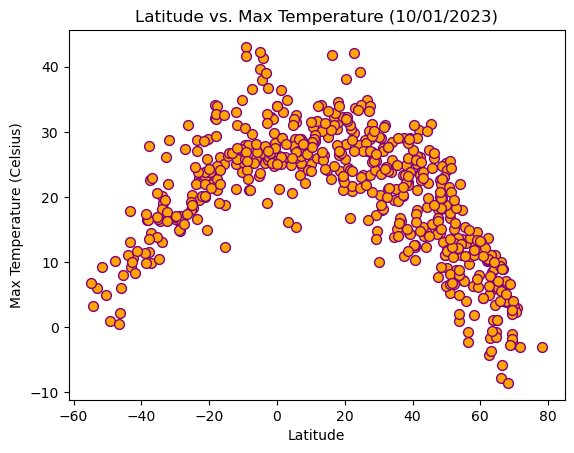

In [12]:
# Build scatter plot for latitude vs. temperature #plt.grid(True) not working????????????????????????
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='purple', c='orange', s=50)

# Incorporate the other graph properties
plt.title("Latitude vs. Max Temperature (10/01/2023)")
plt.ylabel("Max Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid=True

# Save the figure
plt.savefig("../output_data/LatitudeVSTemperaturebyYK.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

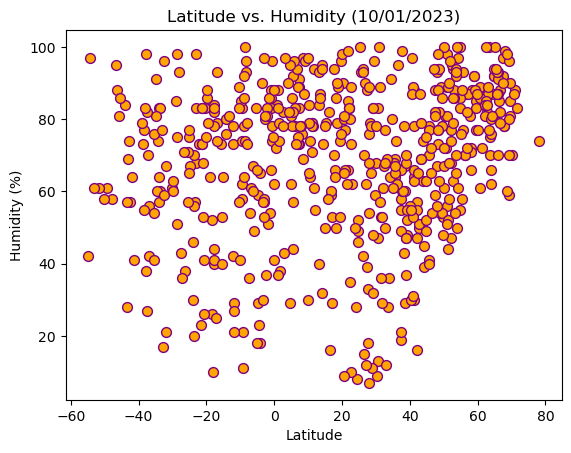

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='purple', c='orange', s=50)

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity (10/01/2023)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid=True

# Save the figure
plt.savefig("../output_data/LatitudeVSHumidity.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

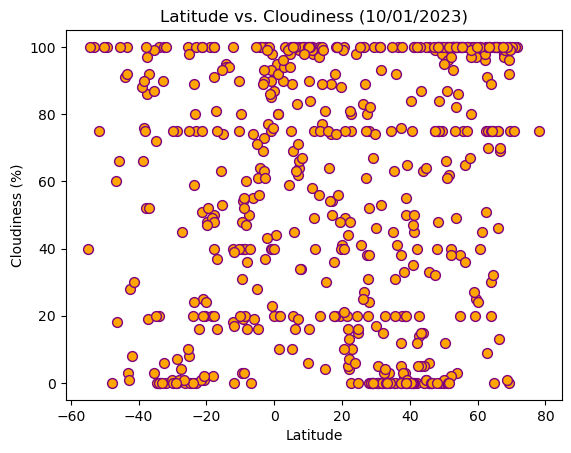

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='purple', c='orange', s=50)

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness (10/01/2023)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid=True

# Save the figure
plt.savefig("../output_data/LatitudeVSCloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

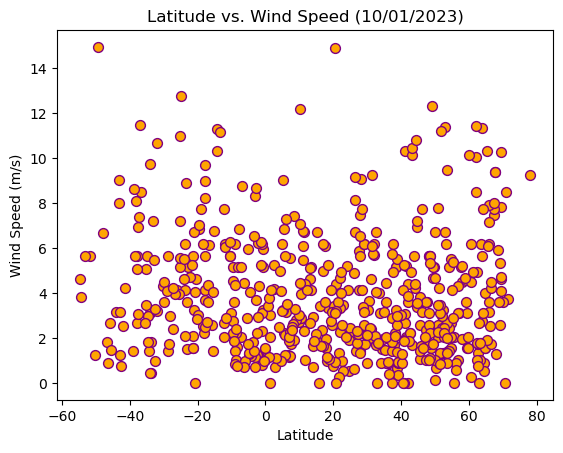

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='purple', c='orange', s=50)

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed (10/01/2023)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid=True

# Save the figure
plt.savefig("../output_data/LatitudeVSWindSpeed.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ochsenhausen,48.0667,9.9500,22.60,67,40,1.03,DE,1696265987
3,bethel,41.3712,-73.4140,25.08,64,0,2.06,US,1696265903
4,talnakh,69.4865,88.3972,-2.66,85,100,7.80,RU,1696265991
6,tralee,52.2704,-9.7026,15.14,77,40,2.57,IE,1696265994
7,fort mcmurray,56.7268,-111.3810,9.73,87,100,1.03,CA,1696265709
11,udachny,66.4167,112.4000,-5.86,85,13,2.52,RU,1696265996
13,prince rupert,54.3161,-130.3201,11.05,97,100,5.14,CA,1696265989
14,abomsa,9.9833,39.9833,25.08,30,6,2.70,ET,1696265998
15,enewetak,11.3474,162.3373,28.96,78,98,6.71,MH,1696265999


In [17]:
northern_hemi_df.to_csv("../output_data/northernhemidf.csv")

In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,0.99,61,100,14.93,TF,1696265988
2,puerto natales,-51.7236,-72.4875,9.25,61,75,5.66,CL,1696265989
5,vila velha,-20.3297,-40.2925,28.97,83,20,4.63,BR,1696265992
8,pangoa,-12.1167,-73.0000,33.06,42,18,2.66,PE,1696265995
9,luanda,-8.8368,13.2343,25.00,78,40,6.17,AO,1696265735
10,chonchi,-42.6128,-73.8092,10.56,57,28,0.77,CL,1696265996
12,villa gesell,-37.2639,-56.9730,14.47,70,19,7.39,AR,1696265997
16,hithadhoo,-0.6000,73.0833,28.08,74,23,5.96,MV,1696266000
17,puerto ayora,-0.7393,-90.3518,27.98,96,98,3.13,EC,1696266001


In [19]:
southern_hemi_df.to_csv("../output_data/southernhemidf.csv")

###  Temperature vs. Latitude Linear Regression Plot

The r-squared value is: -0.8056455688396433


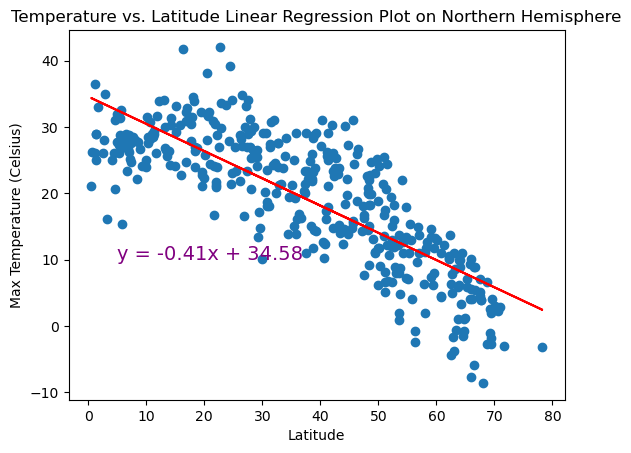

In [20]:
    x_values = pd.to_numeric(northern_hemi_df["Lat"]).astype(float)
    y_values = pd.to_numeric(northern_hemi_df["Max Temp"]).astype(float)
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(5,10),fontsize=14,color="purple")
    plt.xlabel("Latitude")
    plt.ylabel("Max Temperature (Celsius)")
    plt.title("Temperature vs. Latitude Linear Regression Plot on Northern Hemisphere")
    print(f"The r-squared value is: {rvalue}")
    plt.savefig("../output_data/TempvsLatLinearRegressiononNorthernHemisphere.png")
    
    plt.show()

The r-squared value is: 0.7909836287163843


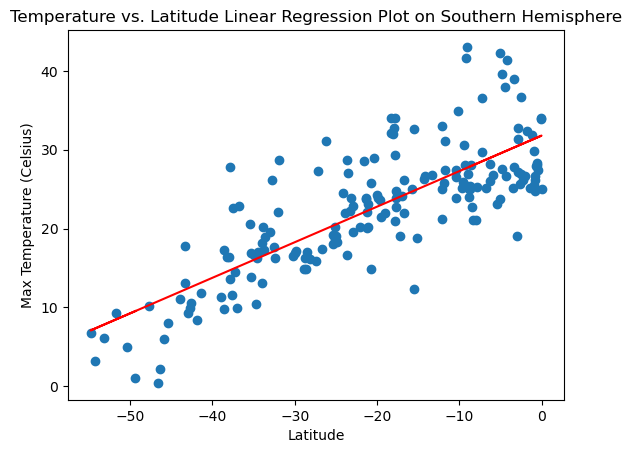

In [21]:
    x_values = southern_hemi_df["Lat"]
    y_values = southern_hemi_df["Max Temp"] 
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="purple")
    plt.xlabel("Latitude")
    plt.ylabel("Max Temperature (Celsius)")
    plt.title("Temperature vs. Latitude Linear Regression Plot on Southern Hemisphere")
    print(f"The r-squared value is: {rvalue}")
    plt.savefig("../output_data/TempvsLatLinearRegressiononSouthernHemisphere.png")
    
    plt.show()

**Discussion about the linear relationship of Temperature vs. Latitude Linear Regression Plot:** As latitude increases the temperature decreases in N.Hemosphere which means moving towards North from equador the temperature decreases, has Negative correlation. 
In S.Hemisphere Latitude decreases as we move towards South from Equador. Temperature decreases as Latitude decreases, or in other words temperature increases as Latitude increases, which means there is a positive correlation.

### Humidity vs. Latitude Linear Regression Plot

The r-squared value is: 0.17220420832043268


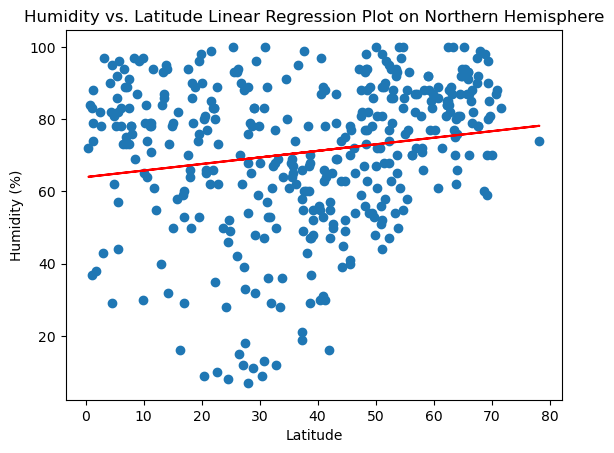

In [22]:
    x_values = northern_hemi_df["Lat"]
    y_values = northern_hemi_df["Humidity"] 

    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,(5.7,0.7),fontsize=13,color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Humidity (%)")
    plt.title("Humidity vs. Latitude Linear Regression Plot on Northern Hemisphere")
    print(f"The r-squared value is: {rvalue}")
    plt.savefig("../output_data/HumidityvsLatLinearRegressiononNorthernHemisphere.png")
    
    plt.show()

The r-squared value is: -0.008340066429193002


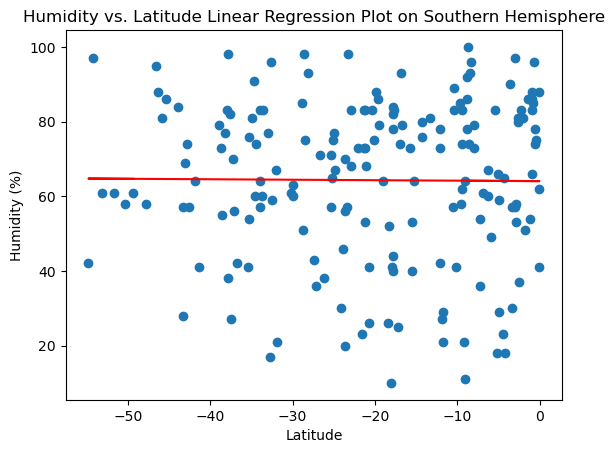

In [23]:
    x_values = southern_hemi_df["Lat"]
    y_values = southern_hemi_df["Humidity"] 
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,(5.7,0.7),fontsize=13,color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Humidity (%)")
    plt.title("Humidity vs. Latitude Linear Regression Plot on Southern Hemisphere")
    print(f"The r-squared value is: {rvalue}")
    plt.savefig("../output_data/HumidityvsLatLinearRegressiononSouthernHemisphere.png")
    
    plt.show()

**Discussion about the linear relationship of Humidity vs. Latitude Linear Regression Plot:** As latitude increases the humidity increases in N.Hemosphere, has Positive correlation. 
In S.Hemisphere the r-squared value is close to "0". So cant talk on correlation relation between Latitude and Humidity. However, might be possible to look deeper with different Lat and Lon coordinates in S.Hemisphere choosen from the dataset. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared value is: 0.1193571405212232


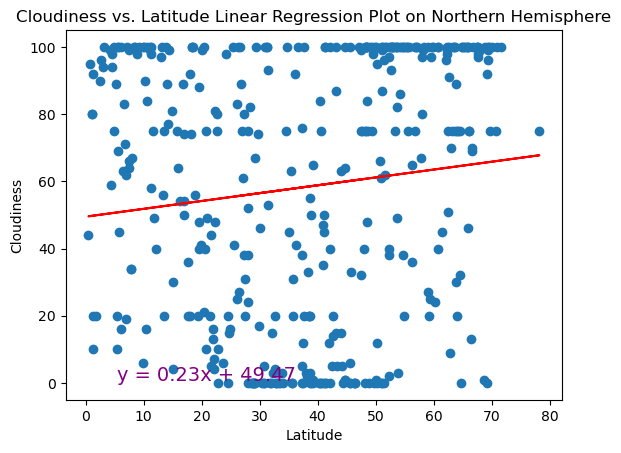

In [24]:
    x_values = northern_hemi_df["Lat"]
    y_values = northern_hemi_df["Cloudiness"] 
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,(5.5,0.5),fontsize=14,color="purple")
    plt.xlabel("Latitude")
    plt.ylabel("Cloudiness")
    plt.title("Cloudiness vs. Latitude Linear Regression Plot on Northern Hemisphere")
    print(f"The r-squared value is: {rvalue}")
    plt.savefig("../output_data/CloudinessVSLatitudeLinearRegressionPlotonNorthernHemisphere.png")

    plt.show()

The r-squared value is: 0.05855690244256254


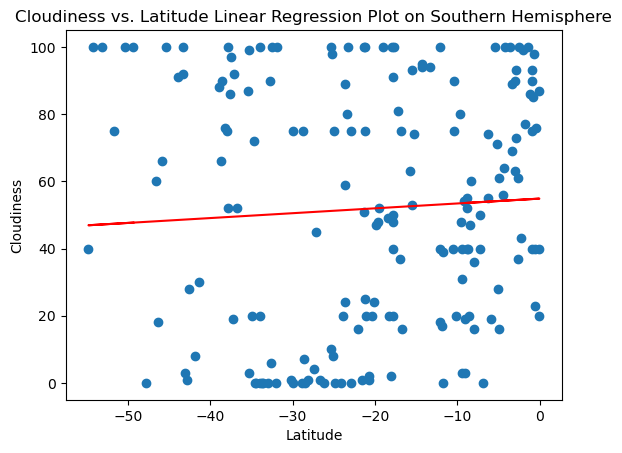

In [25]:
    x_values = southern_hemi_df["Lat"]
    y_values = southern_hemi_df["Cloudiness"] 
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,(5.5,0.5),fontsize=14,color="purple")
    plt.xlabel("Latitude")
    plt.ylabel("Cloudiness")
    plt.title("Cloudiness vs. Latitude Linear Regression Plot on Southern Hemisphere")
    print(f"The r-squared value is: {rvalue}")
    plt.savefig("../output_data/CloudinessVSLatitudeLinearRegressionPlotonSouthernHemisphere.png")
    
    plt.show()

**Discussion about the linear relationship for Cloudiness vs. Latitude Linear Regression Plot:** As latitude increases the Cloudiness increases in N.Hemosphere, has Positive correlation, however not a strong relation. 
In S.Hemisphere the r-squared value is close to "0". So cant talk on exact correlation relation between Latitude and Cloudiness. However, might be possible to look deeper with different Lat and Lon coordinates in S.Hemisphere choosen from the dataset.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared value is: 0.11385457123826835


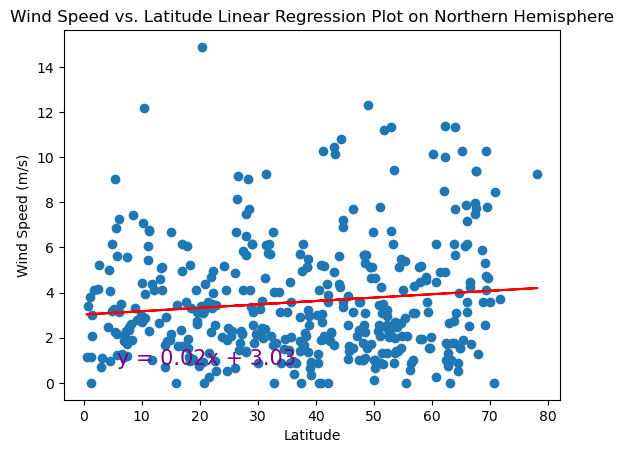

In [26]:
    x_values = northern_hemi_df["Lat"]
    y_values = northern_hemi_df["Wind Speed"] 
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="purple")
    plt.xlabel("Latitude")
    plt.ylabel("Wind Speed (m/s)")
    plt.title("Wind Speed vs. Latitude Linear Regression Plot on Northern Hemisphere")
    print(f"The r-squared value is: {rvalue}")
    plt.savefig("../output_data/WindSpeedVSLatitudeLinearRegressionPlotonNorthernHemisphere.png")
    
    plt.show()

The r-squared value is: -0.14596606163831002


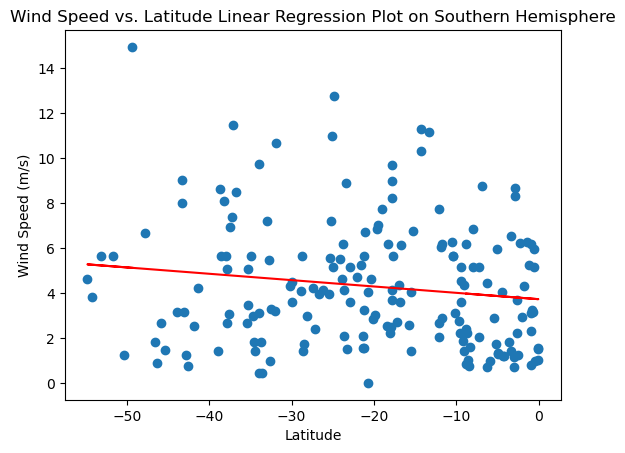

In [27]:
    x_values = southern_hemi_df["Lat"]
    y_values = southern_hemi_df["Wind Speed"] 
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="purple")
    plt.xlabel("Latitude")
    plt.ylabel("Wind Speed (m/s)")
    plt.title("Wind Speed vs. Latitude Linear Regression Plot on Southern Hemisphere")
    print(f"The r-squared value is: {rvalue}")
    plt.savefig("../output_data/WindSpeedVSLatitudeLinearRegressionPlotonSouthernHemisphere.png")

    plt.show()

**Discussion about the linear relationship for Wind Speed vs. Latitude Linear Regression Plot:** As latitude increases the Wind Speed increases in N.Hemosphere, however the r-squared value is close to "0", still has Positive correlation but not a strong relation. 
In S.Hemisphere the r-squared value is also close to "0". So cant talk on exact correlation relation between Latitude and Wind Speed however as Latitude increases the wind speed decreases. In other words closer to the Equador, the less Wind Speed would be observed. Might also be possible to look deeper with different Lat and Lon coordinates in S.Hemisphere choosen from the dataset.

In [ ]:
# Define a function to create Linear Regression plots
##def linear_regression(x_values, y_values, title, coordinates):
##(slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
##regress_values = x_values * slope + intercept
##line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

##Linear regression on Northern Hemisphere did not work
##linear_regression(x_values, y_values, "Max Temp", (5, 10))